# Diamond Price Prediction 

# Attribute Information

__*Price :             is in US dollars*__

__*Carat :             weight of the diamond*__

__*Cut :               quality of the cut (Fair, Good, Very Good, Premium, Ideal)*__

__*color :             diamond colour, from J (worst) to D (best)*__

__*clarity :           a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))*__

__*x :                 length in mm*__

__*y :                 width in mm*__

__*z :                 depth in mm*__

__*depth:              The height of a diamond*__

__*table:              The width of the diamond’s table expressed as a percentage of its average diameter*__

# Data Importing

In [1]:
import pandas as pd                #Data manipulation
import numpy as np                 #linear algebra
import seaborn as sns              #Data visualization
import matplotlib.pyplot as plt    #Data visualization
%matplotlib inline
import warnings                          # Hiding Warnings
warnings.filterwarnings('ignore')

In [2]:
d=pd.read_csv("C:\\Users\\Admin\\Downloads\\diamonds.csv")
d.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [3]:
d.tail(n=2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,2757
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64,2757


In [4]:
d.size

593340

In [5]:
d.shape

(53940, 11)

# Data Cleaning and Preprocessing

Steps involved in Data Preprocessing:

__*1.Data cleaning.*__

__*2.Identifying and removing outliers.*__

__*3.Encoding categorical variables.*__

In [6]:
#The first column seems to be just index
d = d.drop(["Unnamed: 0"], axis=1)
d.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


__*Points to notice:
Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.*__

In [7]:
#Dropping dimentionless diamonds
d = d.drop(d[d["x"]==0].index)
d = d.drop(d[d["y"]==0].index)
d = d.drop(d[d["z"]==0].index)
d.shape

(53920, 10)

In [ ]:
# We lost 20 data points by deleting the dimensionless(2-D or 1-D) diamonds.

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   x        53920 non-null  float64
 7   y        53920 non-null  float64
 8   z        53920 non-null  float64
 9   price    53920 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [9]:
d.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [10]:
d.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
x            553
y            550
z            374
price      11597
dtype: int64

In [11]:
#Checking Missing value
d.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
#Checking duplicated value
d.duplicated().sum()

145

carat        AxesSubplot(0.125,0.71587;0.168478x0.16413)
depth     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
table     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
x         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
y           AxesSubplot(0.125,0.518913;0.168478x0.16413)
z        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
price    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
dtype: object

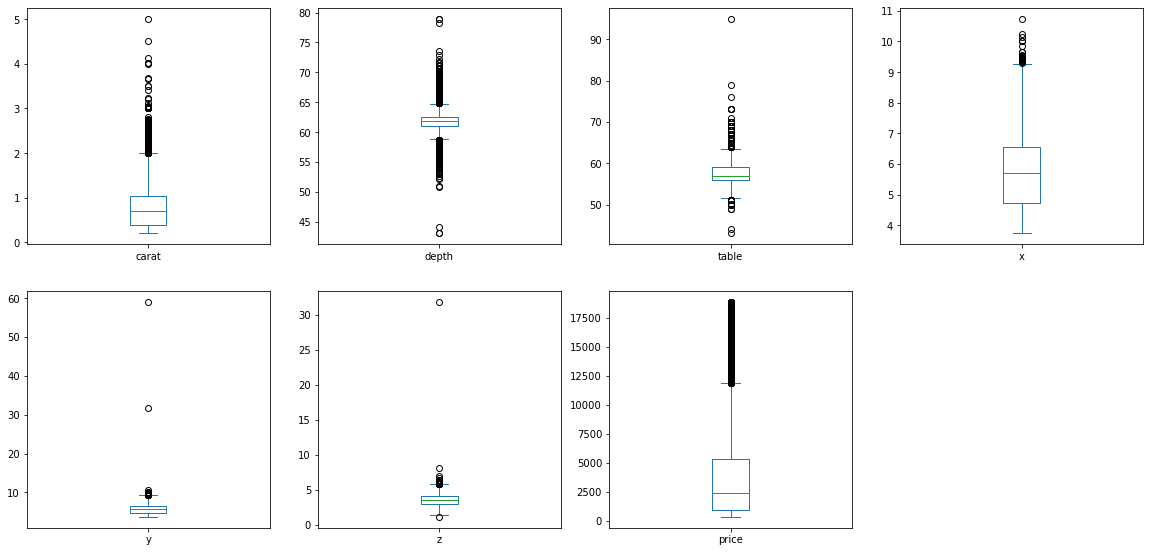

In [13]:
#Outlier Detection
d.plot(kind="box",subplots=True,layout=(4,4),sharex=False,sharey=False,figsize=(20,20))

In [14]:
#Dropping the outliers. 
d = d[(d["depth"]<63)&(d["depth"]>60)]
d= d[(d["table"]<60)&(d["table"]>55)]
d = d[(d["x"]<9)]
d = d[(d["y"]<9)]
d = d[(d["z"]<6)&(d["z"]>2)]
d= d[(d["carat"]<2.0)]
d = d[(d["price"]<10000)]

carat        AxesSubplot(0.125,0.71587;0.168478x0.16413)
depth     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
table     AxesSubplot(0.529348,0.71587;0.168478x0.16413)
x         AxesSubplot(0.731522,0.71587;0.168478x0.16413)
y           AxesSubplot(0.125,0.518913;0.168478x0.16413)
z        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
price    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
dtype: object

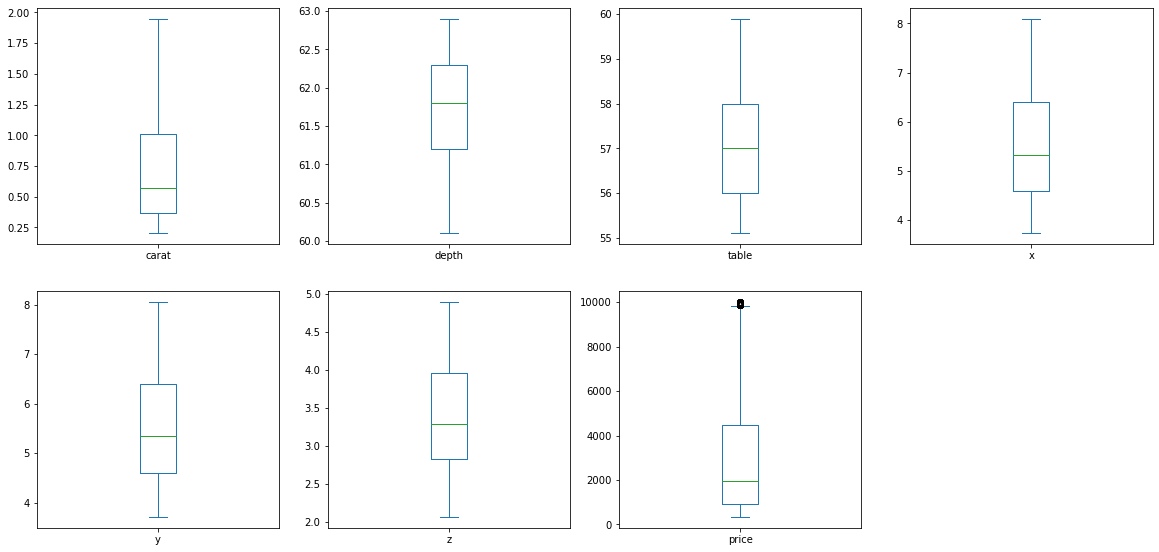

In [15]:
d.plot(kind="box",subplots=True,layout=(4,4),sharex=False,sharey=False,figsize=(20,20))

__*It seems to be no more outliers present in the data*__

In [ ]:
#Encoding Categorical Variable

In [16]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [17]:
lst=[]
for i in d.columns:
    if d[i].dtype=="O":
        lst.append(i)
        
lst        

['cut', 'color', 'clarity']

In [18]:
for i in lst:
    d[i]=lb.fit_transform(d[i])

In [19]:
d.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
5,0.24,4,6,7,62.8,57.0,3.94,3.96,2.48,336
6,0.24,4,5,6,62.3,57.0,3.95,3.98,2.47,336
11,0.23,2,6,4,62.8,56.0,3.93,3.90,2.46,340
15,0.32,3,1,0,60.9,58.0,4.38,4.42,2.68,345


In [20]:
#Checking Multicollinearity
d.corr()

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,0.077338,0.304649,-0.252608,0.083597,0.130620,0.988038,0.986942,0.988115,0.930715
cut,0.077338,1.000000,0.036676,-0.027577,0.090032,0.466051,0.062148,0.068078,0.070660,0.046394
color,0.304649,0.036676,1.000000,-0.033778,0.051363,0.054998,0.279831,0.279938,0.282078,0.190954
clarity,-0.252608,-0.027577,-0.033778,1.000000,-0.033104,-0.062301,-0.260326,-0.258575,-0.260509,-0.111728
depth,0.083597,0.090032,0.051363,-0.033104,1.000000,-0.027486,0.046990,0.045766,0.113723,0.063925
table,0.130620,0.466051,0.054998,-0.062301,-0.027486,1.000000,0.115276,0.111009,0.110762,0.097736
x,0.988038,0.062148,0.279831,-0.260326,0.046990,0.115276,1.000000,0.998375,0.997076,0.912592
y,0.986942,0.068078,0.279938,-0.258575,0.045766,0.111009,0.998375,1.000000,0.996928,0.912912
z,0.988115,0.070660,0.282078,-0.260509,0.113723,0.110762,0.997076,0.996928,1.000000,0.912283
price,0.930715,0.046394,0.190954,-0.111728,0.063925,0.097736,0.912592,0.912912,0.912283,1.000000


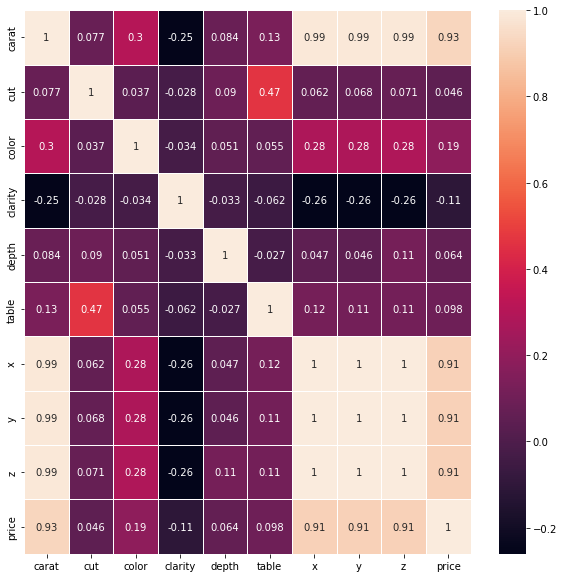

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(d.corr(),annot=True,linewidths=1)
plt.show()

__*Points to notice:
"x", "y" and "z" show a high correlation to the target column.
"depth", "cut" and "table" show low correlation. We could consider dropping but let's keep it.*__

# Splitting Data into depenedent and independent variable

In [22]:
x=d.iloc[:,1:9]
x.head()

,cut,color,clarity,depth,table,x,y,z
3,3,5,5,62.4,58.0,4.20,4.23,2.63
5,4,6,7,62.8,57.0,3.94,3.96,2.48
6,4,5,6,62.3,57.0,3.95,3.98,2.47
11,2,6,4,62.8,56.0,3.93,3.90,2.46
15,3,1,0,60.9,58.0,4.38,4.42,2.68


In [23]:
y=d.price
y.head()

3     334
5     336
6     336
11    340
15    345
Name: price, dtype: int64

# Splittig data into train test

__*Now I split variable into training and testing sets. I will perform this by importing train_test_split from the sklearn.model_selection library. It is usually a good practice to keep 70% of data in train dataset and the rest 30% in test dataset*.__

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=55)

In [26]:
X_train.shape, y_train.shape

((17003, 8), (17003,))

In [27]:
X_train

,cut,color,clarity,depth,table,x,y,z
48532,2,0,5,61.1,56.0,5.16,5.20,3.17
34980,2,2,5,62.1,56.0,4.47,4.45,2.77
35268,4,3,1,62.8,57.0,4.28,4.32,2.70
12632,3,2,2,60.3,58.0,6.47,6.43,3.89
50567,4,2,3,61.1,59.0,5.85,5.95,3.59
...,...,...,...,...,...,...,...,...
35871,2,1,6,61.1,56.0,4.36,4.38,2.67
20896,2,3,4,61.8,58.0,6.85,6.90,4.25
37900,2,0,5,61.7,56.0,4.78,4.81,2.96
39930,4,5,5,61.7,57.0,4.52,4.56,2.80


In [28]:
 y_train

48532    1986
34980     880
35268     895
12632    5292
50567    2278
         ... 
35871     918
20896    9116
37900    1007
39930     491
10469    4791
Name: price, Length: 17003, dtype: int64

In [29]:
X_test.shape,y_test.shape

((7287, 8), (7287,))

# Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[-0.84763778, -1.49995079,  0.58791092, ..., -0.34749603,
        -0.31369483, -0.37323135],
       [-0.84763778, -0.30713178,  0.58791092, ..., -1.07713581,
        -1.11033384, -1.0563592 ],
       [ 1.68240438,  0.28927773, -1.71298662, ..., -1.27805111,
        -1.24841794, -1.17590657],
       ...,
       [-0.84763778, -1.49995079,  0.58791092, ..., -0.74932663,
        -0.72794712, -0.73187347],
       [ 1.68240438,  1.48209674,  0.58791092, ..., -1.02426336,
        -0.99349345, -1.00512461],
       [ 1.68240438,  0.88568723, -1.13776224, ...,  0.98488966,
         1.04590243,  1.06133712]])

# Creating Linear Regression Model

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from math import sqrt
import numpy as np
from sklearn import metrics

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
model.intercept_

2897.0839851790865

In [35]:
model.coef_

array([ -39.81685258, -189.05804381,  341.32510202,   10.08034309,
         22.16352817,  451.95322378,  996.82367073,  909.02483563])

# Model Prediction

In [36]:
y_pred=model.predict(X_test)
y_pred

array([5062.41013182, 5643.0867625 , 3522.44645428, ..., 5475.46424653,
       -575.5156812 , 2733.81659023])

In [37]:
r2=r2_score(y_test,y_pred)
r2

0.8571877791371613

__*r2 measure the proportion of variation explianed by the regressor X*__

_*Here the value of r2 is  **0.8571877791371613**  which is closed to 1 which implies that most of the variability in y explained by the regression model.*__

In [38]:
print("MSE : ",(mean_squared_error(y_test,y_pred)))
print("MAE : ",mean_absolute_error(y_test, y_pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE :  867168.1859994461
MAE :  720.3744719376415
RMSE :  931.2186563849792


In [39]:
df=pd.DataFrame(y_pred,y_test)
df

,0
price,
4452,5062.410132
5586,5643.086762
2644,3522.446454
810,1058.469525
4751,5065.399795
...,...
810,422.354824
3176,3812.267077
6083,5475.464247


# __*Thank You*__